### sub-tasks  
- Identifying the top 10 handsets used by the customers.
- Identify the top 3 handset manufacturers
- Identify the top 5 handsets per top 3 handset manufacturer
- Interpretation and Recommendation to marketing teams


## Importing Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import math
import sys, os


In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts..')))
from data_visualizer import *
from data_selecter import *

## Data Loading

In [5]:
# Load the cleaned csv data file

clean_data = pd.read_csv("../src/data/my_clean_data2.csv")
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146887 entries, 0 to 146886
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        146887 non-null  int64  
 1   Bearer Id                         146887 non-null  int64  
 2   Start                             146887 non-null  object 
 3   Start ms                          146887 non-null  float64
 4   End                               146887 non-null  object 
 5   End ms                            146887 non-null  float64
 6   IMSI                              146887 non-null  int64  
 7   MSISDN/Number                     146887 non-null  int64  
 8   IMEI                              146887 non-null  int64  
 9   Last Location Name                146887 non-null  object 
 10  Avg RTT DL (ms)                   146887 non-null  float64
 11  Avg RTT UL (ms)                   146887 non-null  f

## Exploratory Data Analysis

### - Univariate analysis 

### 👉  Handset Type

In [6]:
# unique value counts
counts_HS = clean_data['Handset Type'].value_counts()
counts_HS

Handset Type
Huawei B528S-23A                              19373
Apple iPhone 6S (A1688)                        9369
Apple iPhone 6 (A1586)                         8967
undefined                                      8820
Apple iPhone 7 (A1778)                         6240
                                              ...  
Tct Mobile Suzho. Alcatel One Touch Pop C5        1
Kvd Internationa. Doogee S60                      1
Zebra Technologi. Mc5574                          1
Shenzhen Gaoxinq. Gaoxinqi Et110                  1
Huawei Bln-Al10                                   1
Name: count, Length: 1363, dtype: int64

In [8]:
plotly_plot_pie(clean_data, 'Handset Type', 4000)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
                               ..., 'Zebra Technologi. Mc5574', 'Shenzhen Gaoxinq. Gaoxinqi Et110',
                               'Huawei Bln-Al10'], shape=(1363,), dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([19373,  9369,  8967, ...,     1,     1,     1], shape=(1363,))}],
    'layout': {'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Top 4000 Handset Type Distribution'},
               'width': 800}
})

**- *The result above shows the top 10 handsets used by the customers***

### 👉  Top Handset Manufacturers

In [9]:
counts_HSM = clean_data['Handset Type'].value_counts()
counts_HSM.head()

Handset Type
Huawei B528S-23A           19373
Apple iPhone 6S (A1688)     9369
Apple iPhone 6 (A1586)      8967
undefined                   8820
Apple iPhone 7 (A1778)      6240
Name: count, dtype: int64

### 👉  Total Duration of the xDR (in ms)

In [10]:
clean_data[['Dur. (ms).1']].describe()

,Dur. (ms).1
count,1.468870e+05
mean,1.001894e+08
std,5.898822e+07
min,7.142988e+06
25%,5.852686e+07
50%,8.639998e+07
75%,1.331594e+08
max,2.451082e+08


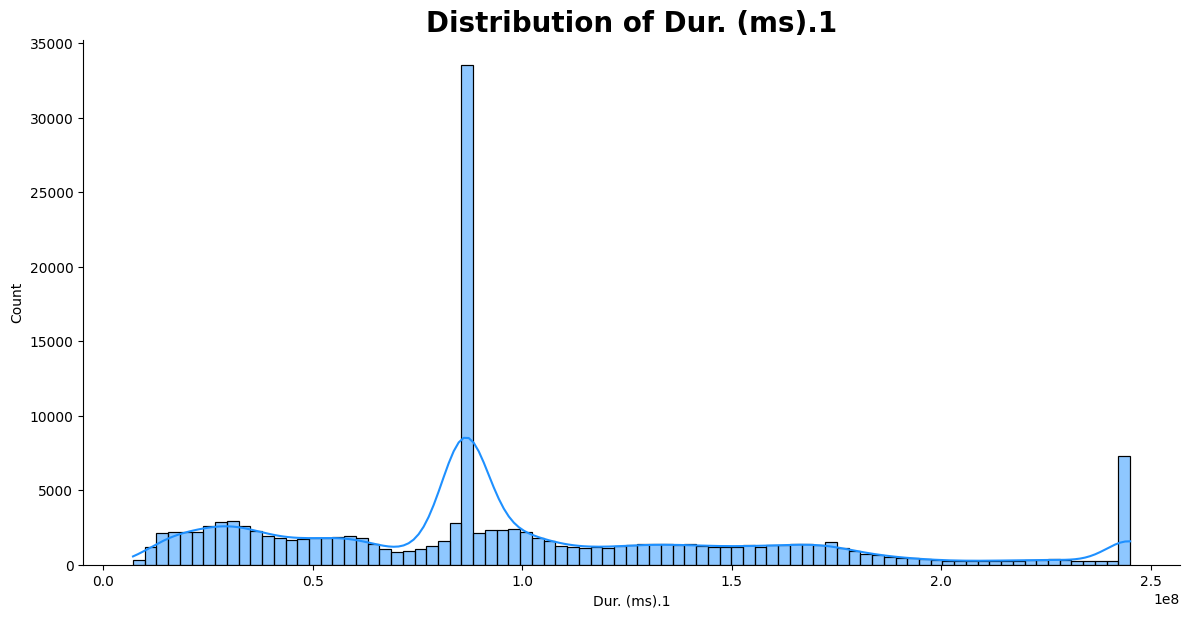

In [11]:
plot_hist(clean_data, 'Dur. (ms).1', 'dodgerblue')

## Total Downloads

In [12]:
clean_data[['Total DL (Bytes)']].describe()

,Total DL (Bytes)
count,1.468870e+05
mean,4.546601e+08
std,2.442101e+08
min,7.114041e+06
25%,2.430734e+08
50%,4.559639e+08
75%,6.657831e+08
max,9.029696e+08


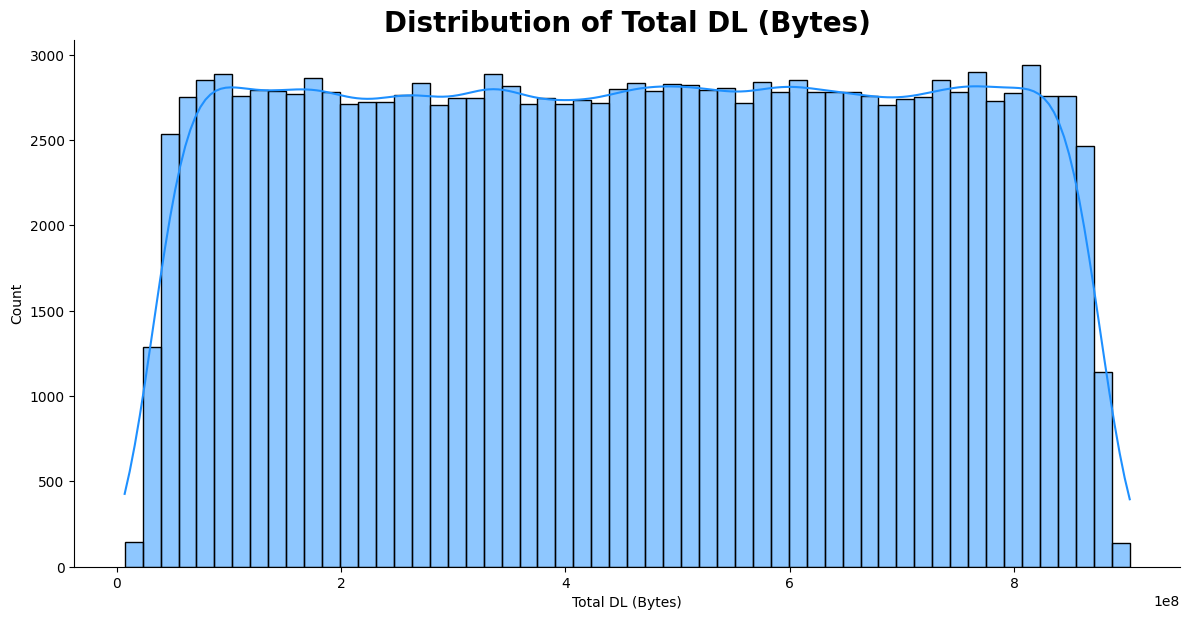

In [13]:
plot_hist(clean_data, 'Total DL (Bytes)', 'dodgerblue')

## Total Uploads

In [14]:
clean_data[['Total UL (Bytes)']].describe()

,Total UL (Bytes)
count,1.468870e+05
mean,4.112139e+07
std,1.127057e+07
min,9.493545e+06
25%,3.321835e+07
50%,4.114314e+07
75%,4.903488e+07
max,7.275968e+07


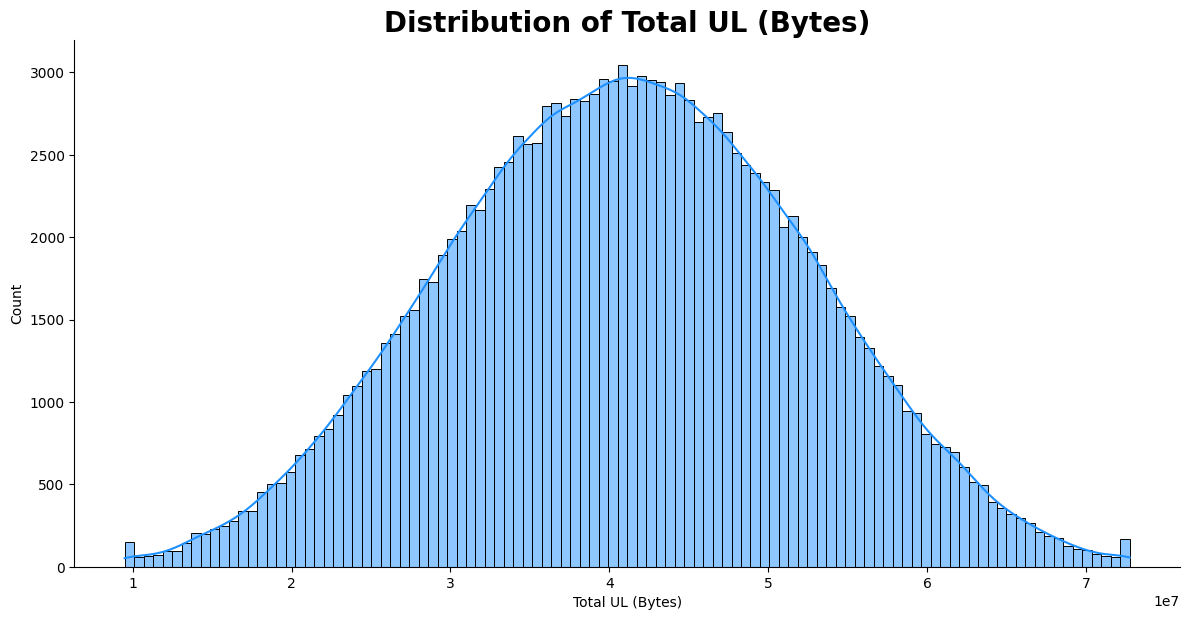

In [15]:
plot_hist(clean_data, 'Total UL (Bytes)', 'dodgerblue')

## Total data volume

In [16]:
total_data = clean_data.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data[['Total Data Volume (Bytes)']].describe()


,Total Data Volume (Bytes)
count,3.491000e+04
mean,2.086046e+09
std,2.330704e+09
min,3.792924e+07
25%,6.288940e+08
50%,1.173810e+09
75%,2.560850e+09
max,3.592171e+10


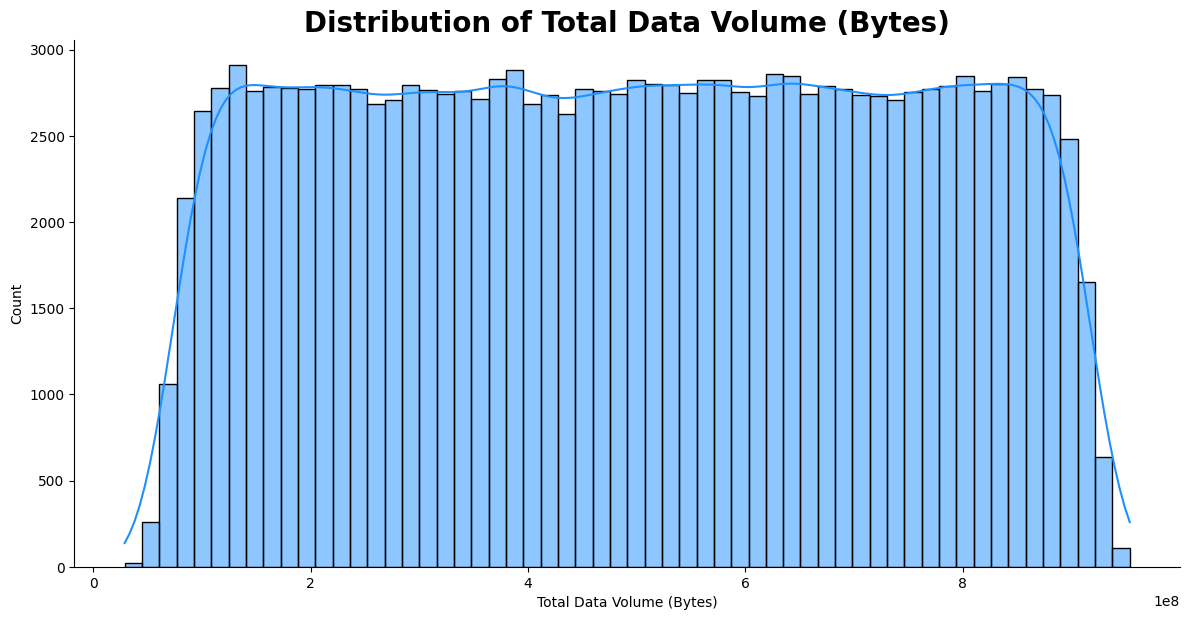

In [17]:
plot_hist(clean_data, 'Total Data Volume (Bytes)', 'dodgerblue')

### Social Media Data Volume (Bytes)

In [18]:
clean_data[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.468870e+05
mean,1.827736e+06
std,1.035571e+06
min,1.563000e+03
25%,9.313390e+05
50%,1.825390e+06
75%,2.727156e+06
max,3.650861e+06


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

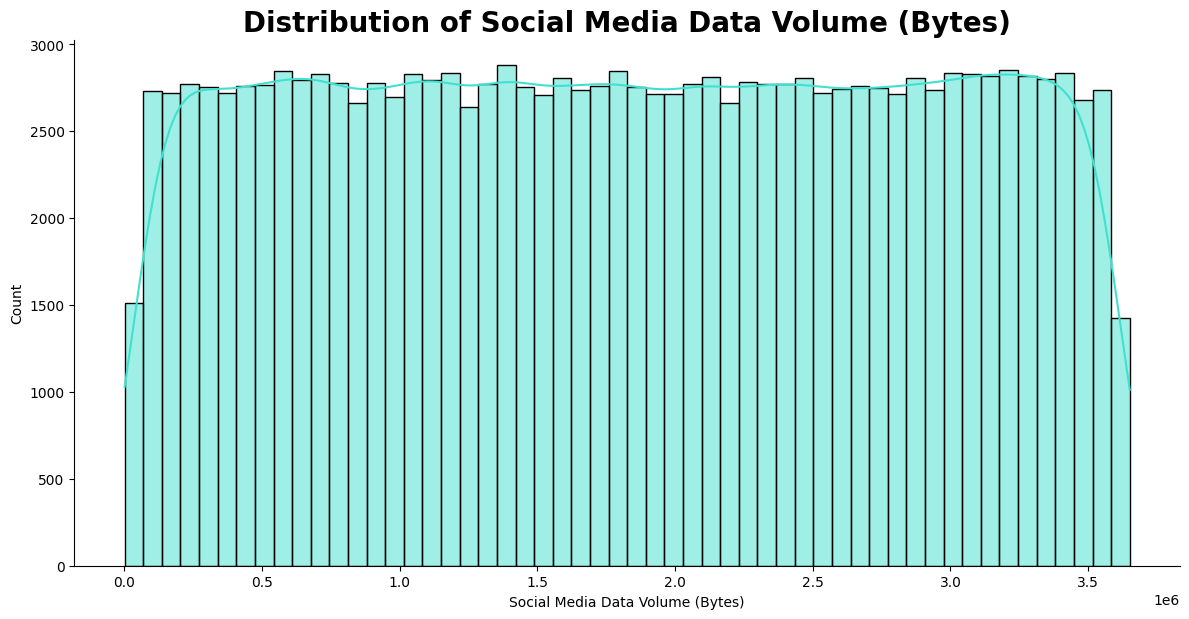

In [20]:
plot_hist(clean_data, 'Social Media Data Volume (Bytes)', '#40E0D0')

### Google Usage Data Volumes (Bytes)

In [21]:
clean_data[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,1.468870e+05
mean,7.807976e+06
std,3.517132e+06
min,4.033000e+04
25%,4.943585e+06
50%,7.815531e+06
75%,1.068314e+07
max,1.552878e+07


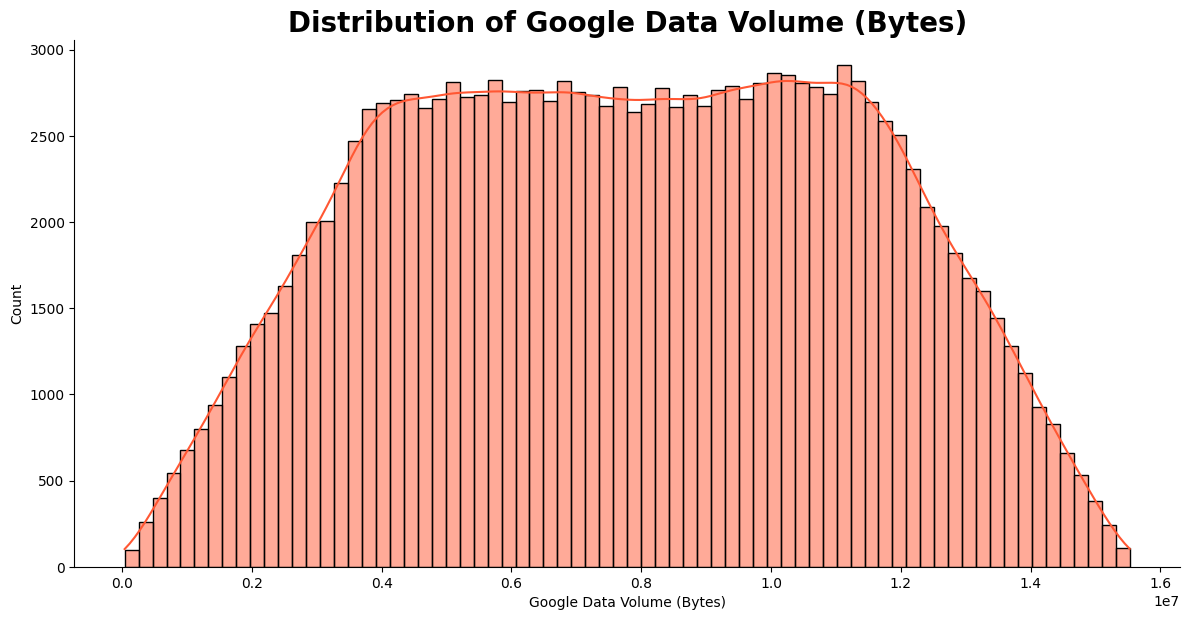

In [22]:
plot_hist(clean_data, 'Google Data Volume (Bytes)', '#FF5733')

### Email Usage Data Volumes (Bytes)

In [23]:
clean_data[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.468870e+05
mean,2.259087e+06
std,1.071133e+06
min,8.359000e+03
25%,1.359012e+06
50%,2.263890e+06
75%,3.159616e+06
max,4.518036e+06


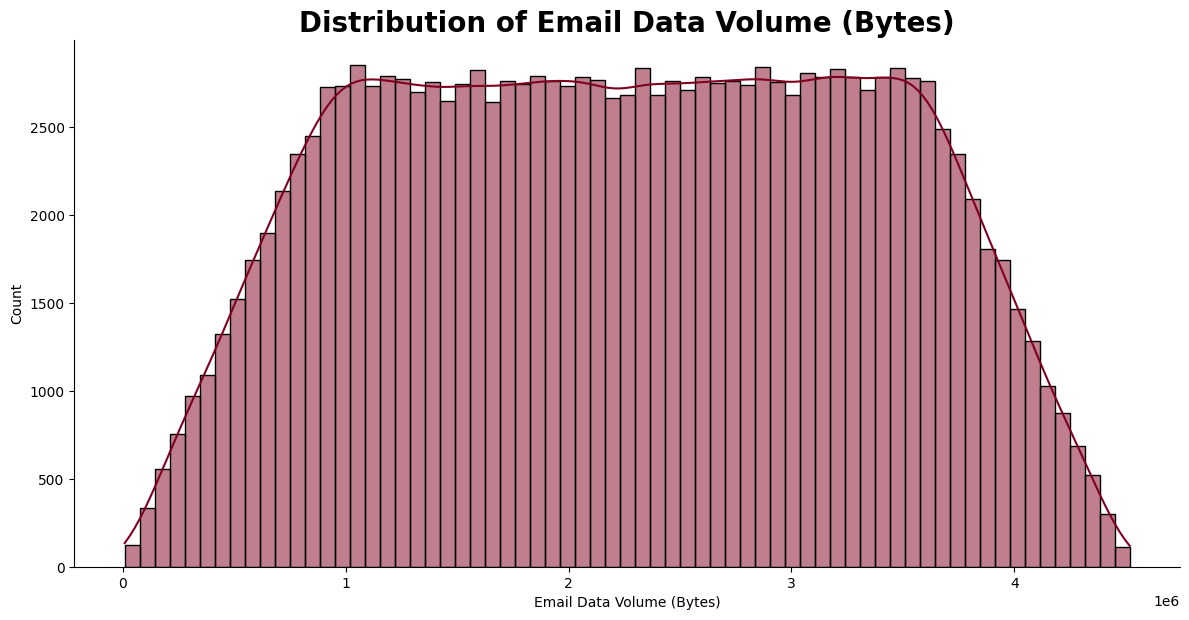

In [24]:
plot_hist(clean_data, 'Email Data Volume (Bytes)', '#800020')

### Youtube Usage Data Volumes (Bytes)

In [25]:
clean_data[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.468870e+05
mean,2.264198e+07
std,9.244659e+06
min,1.296550e+05
25%,1.599692e+07
50%,2.266341e+07
75%,2.929351e+07
max,4.519008e+07


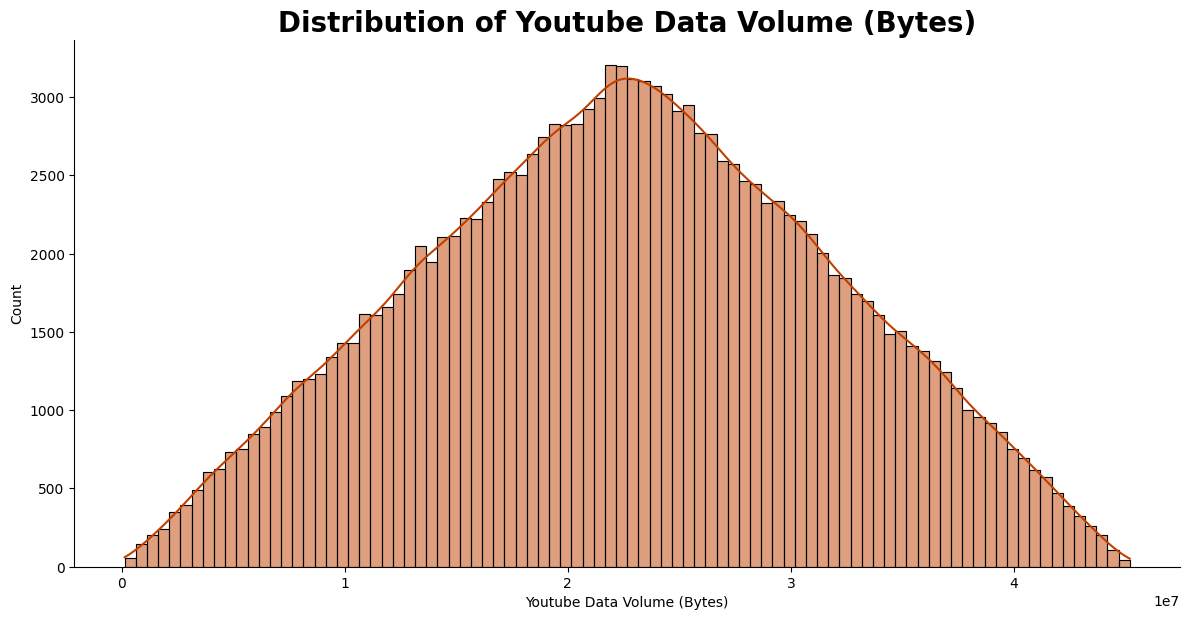

In [26]:
plot_hist(clean_data, 'Youtube Data Volume (Bytes)', '#C04000')

### Netflix Usage Data Volumes (Bytes)

In [27]:
clean_data[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.468870e+05
mean,2.262923e+07
std,9.259113e+06
min,9.843200e+04
25%,1.598200e+07
50%,2.263459e+07
75%,2.928806e+07
max,4.519815e+07


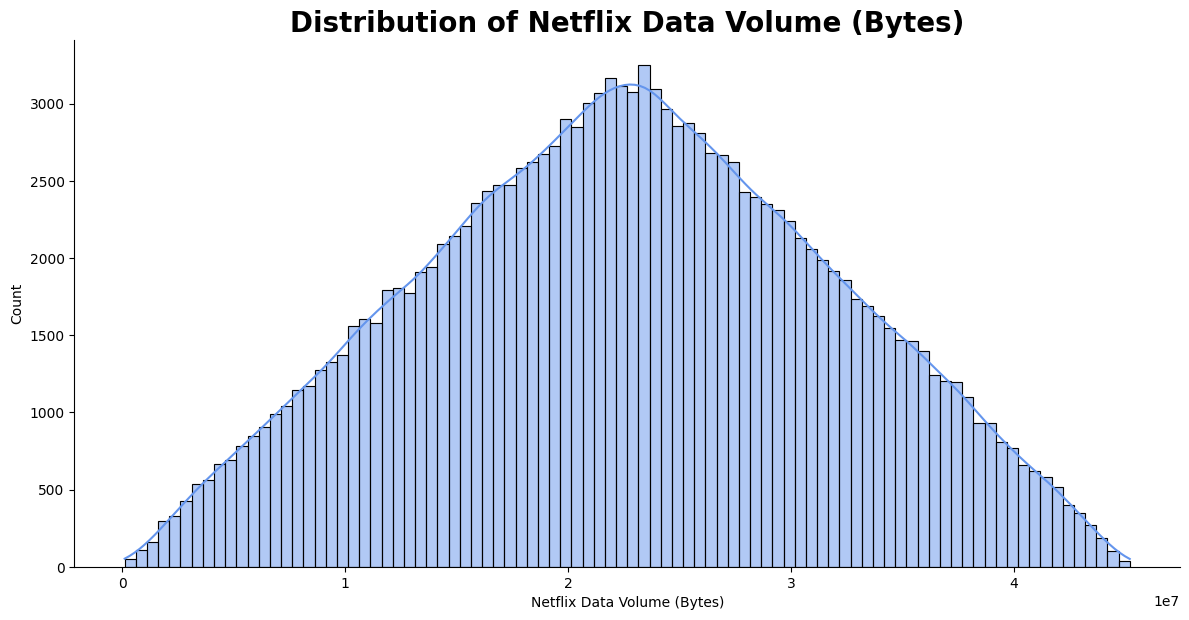

In [28]:
plot_hist(clean_data, 'Netflix Data Volume (Bytes)')

### Data Volumes Due to Gaming (Bytes)

In [29]:
clean_data[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.468870e+05
mean,4.303526e+08
std,2.440925e+08
min,3.063580e+05
25%,2.186904e+08
50%,4.316603e+08
75%,6.415752e+08
max,8.592028e+08


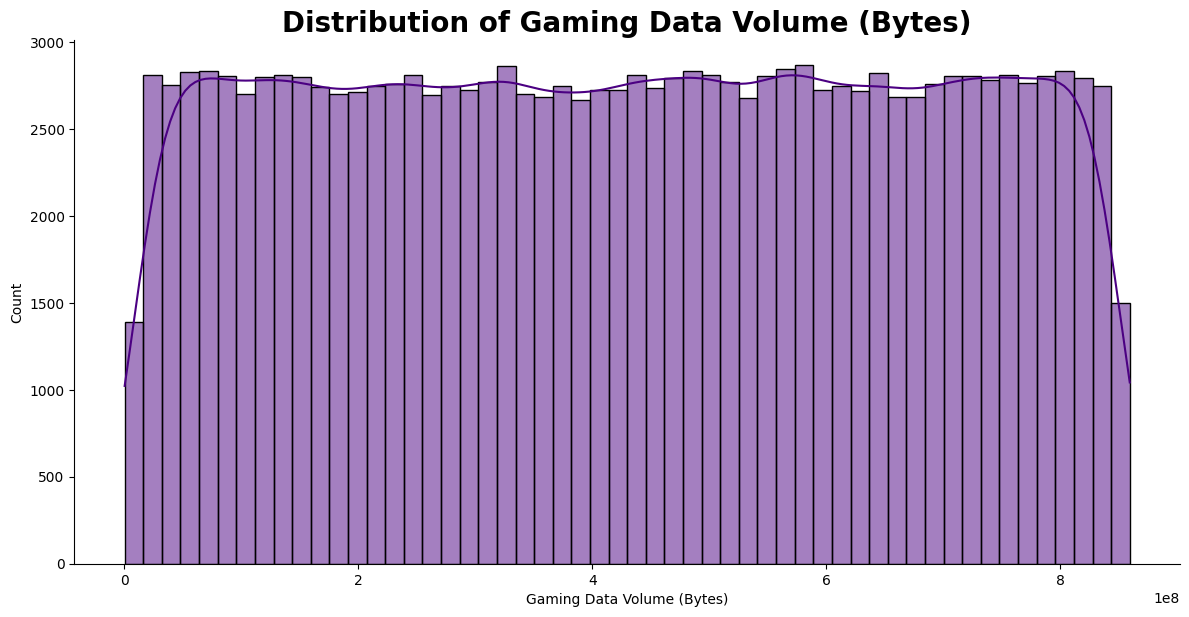

In [30]:
plot_hist(clean_data, 'Gaming Data Volume (Bytes)', 'indigo')

### Other Data Volume (Bytes)

In [31]:
clean_data[['Other Data Volume (Bytes)']].describe()

,Other Data Volume (Bytes)
count,1.468870e+05
mean,4.292669e+08
std,2.432060e+08
min,1.490450e+05
25%,2.184772e+08
50%,4.297978e+08
75%,6.396625e+08
max,8.595209e+08


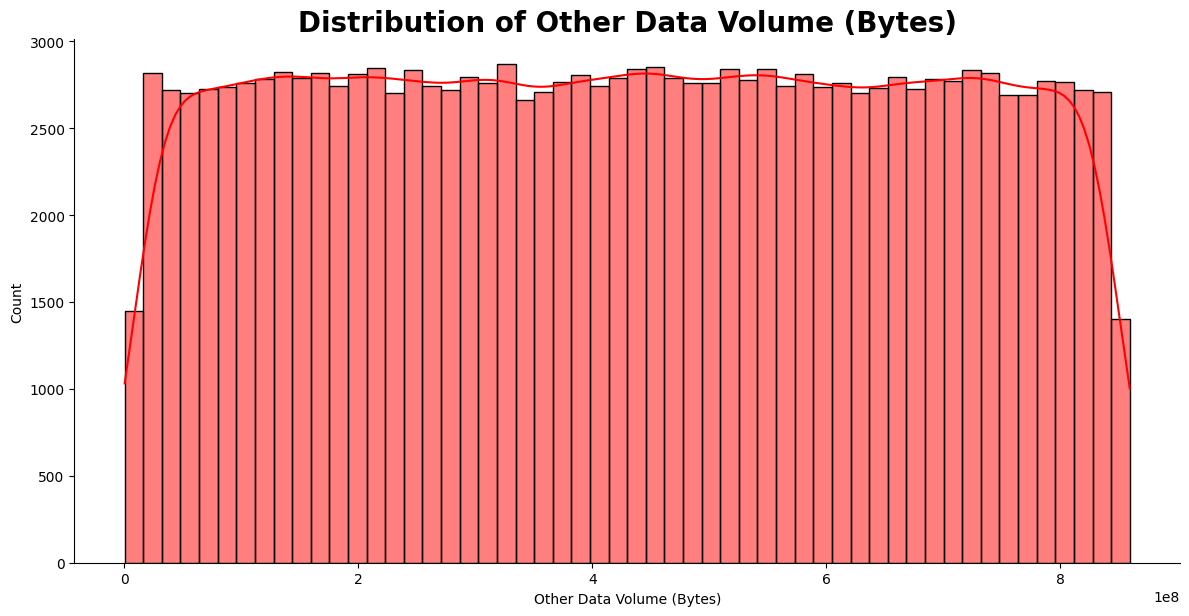

In [32]:
plot_hist(clean_data, 'Other Data Volume (Bytes)', 'red')

### Total Data Volumes (Bytes)

In [33]:
clean_data[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.468870e+05
mean,4.957815e+08
std,2.444434e+08
min,2.895611e+07
25%,2.844777e+08
50%,4.969362e+08
75%,7.066379e+08
max,9.536316e+08


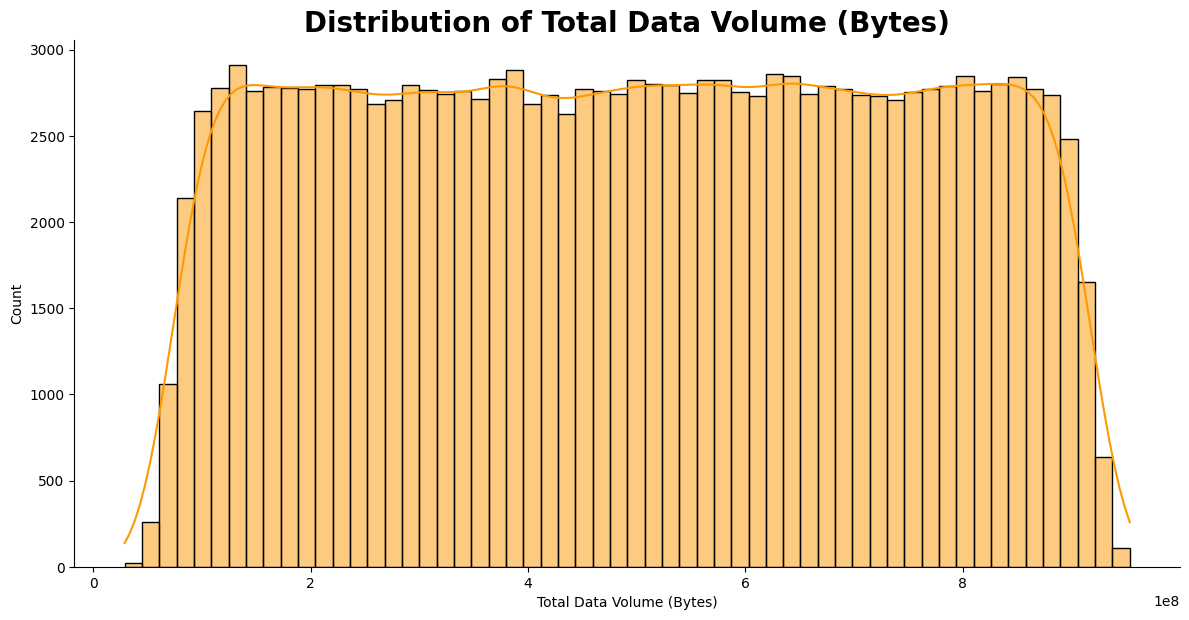

In [34]:
plot_hist(clean_data, 'Total Data Volume (Bytes)', '#FC9903')

## Bivariate analysis

### - Social Media Data Volume Vs Total Data Volume (Bytes)

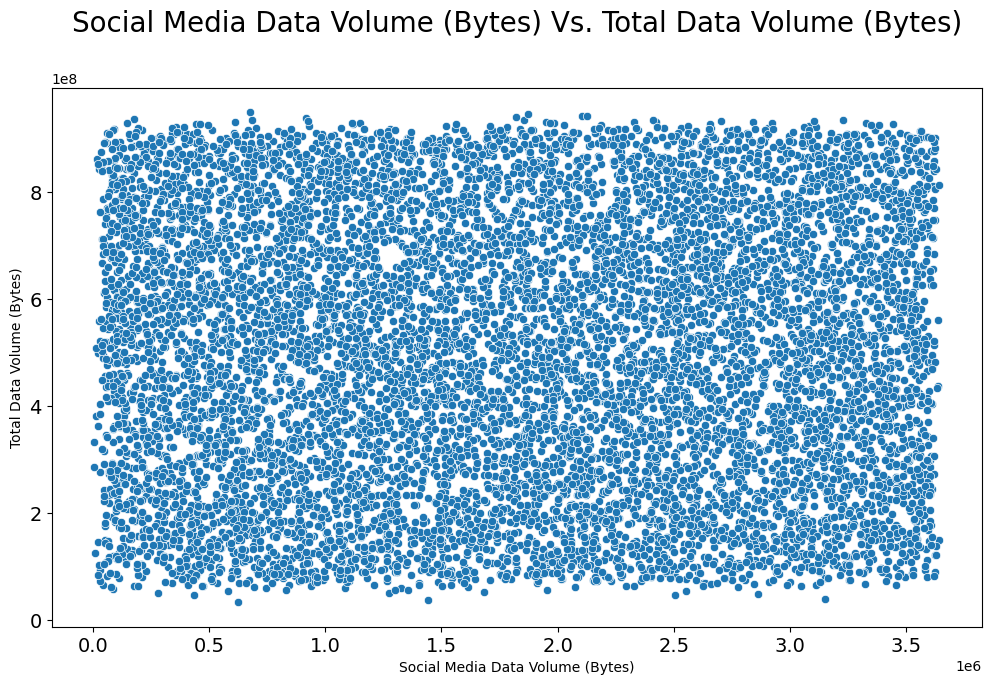

In [35]:
plot_scatter(clean_data.sample(10000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)')

## - Google Data Volume Vs Total Data Volume (Bytes)

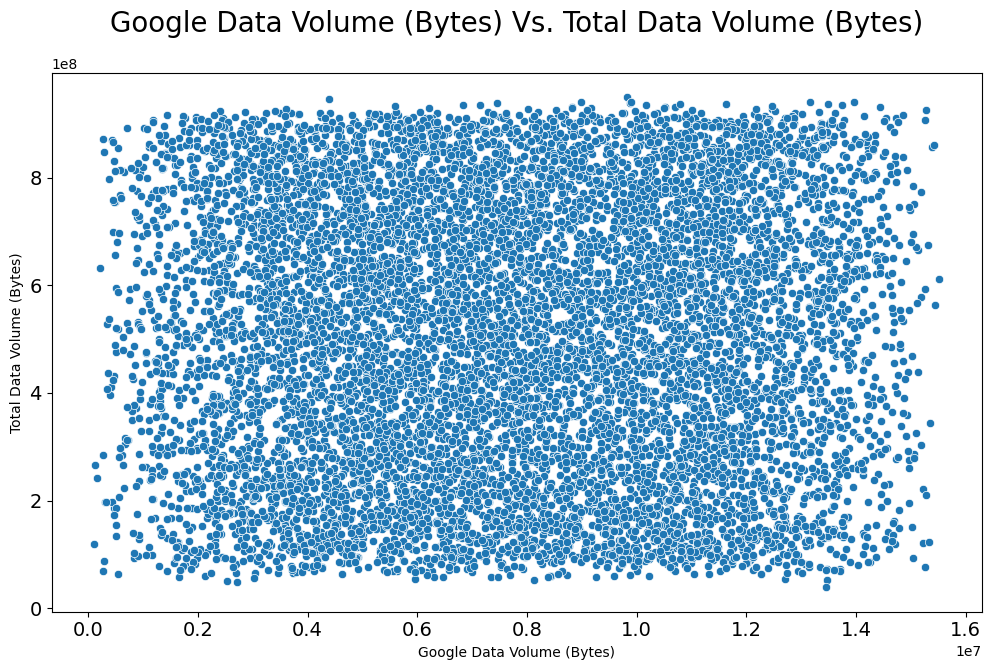

In [36]:
plot_scatter(clean_data.sample(10000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)')

## - Email Data Volume Vs Total Data Volume (Bytes)

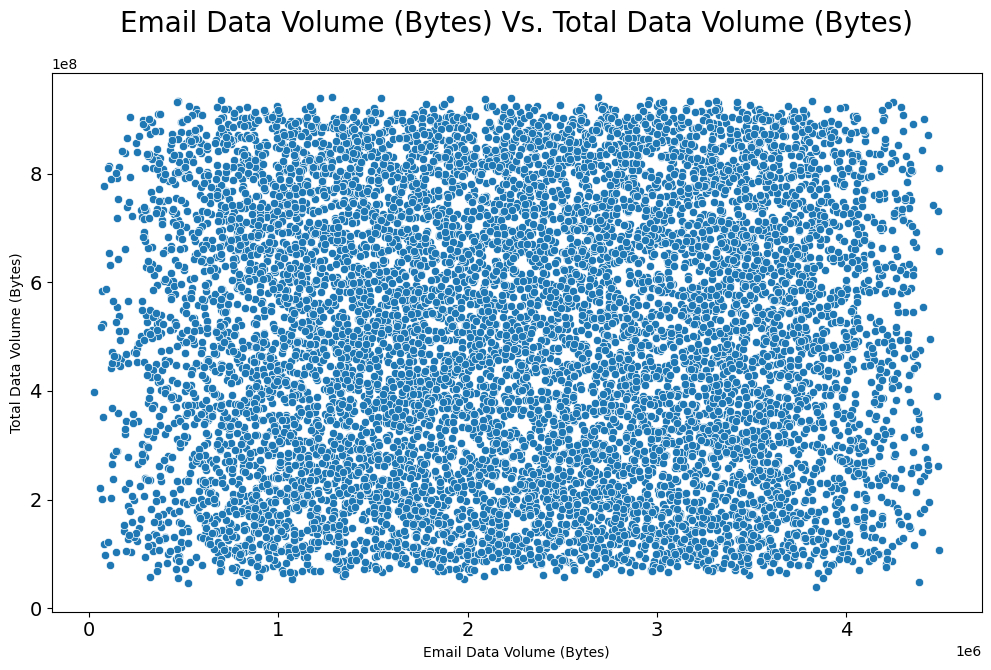

In [37]:
plot_scatter(clean_data.sample(10000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

## - Youtube Data Volume Vs Total Data Volume (Bytes)

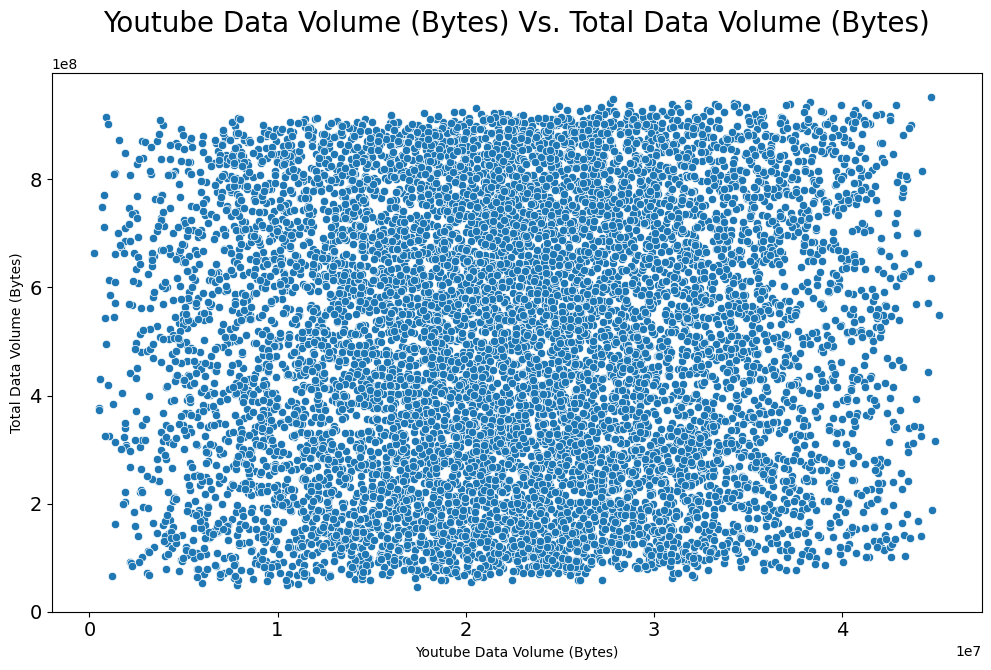

In [38]:
plot_scatter(clean_data.sample(10000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)')

## - Netflix Data Volume Vs Total Data Volume (Bytes)

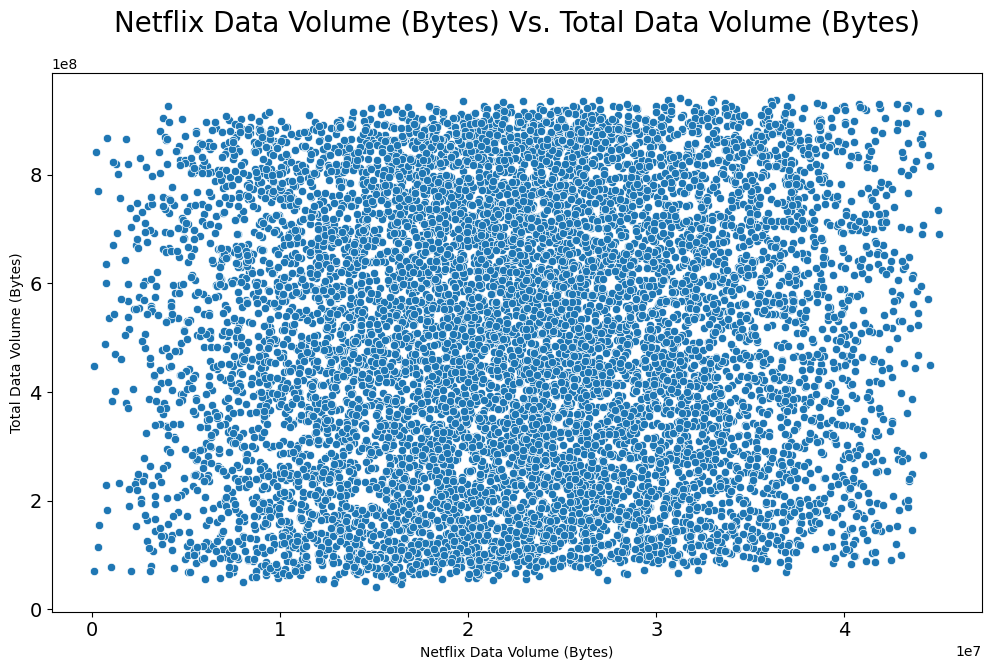

In [39]:
plot_scatter(clean_data.sample(10000), 'Netflix Data Volume (Bytes)', 'Total Data Volume (Bytes)')

## - Gaming Data Volume Vs Total Data Volume (Bytes)

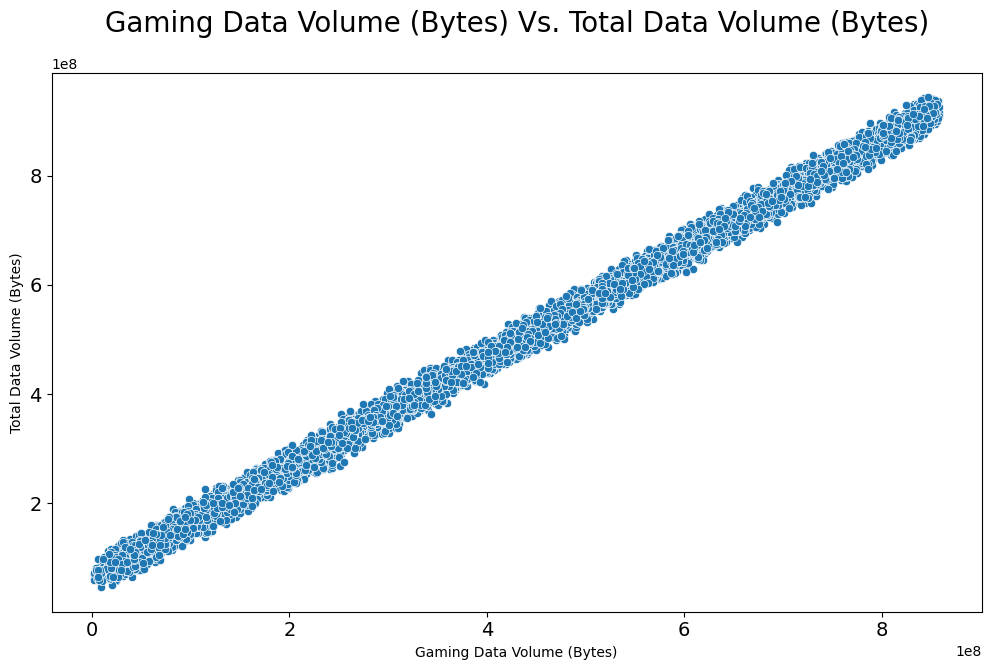

In [40]:
plot_scatter(clean_data.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')

## - Correlation Analysis

In [41]:
Application_used = ['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']

corr = clean_data[Application_used].corr()
corr

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001933,0.004208,0.000570,0.001354,0.001894,0.005561
Google Data Volume (Bytes),-0.001933,1.000000,-0.000036,0.002172,-0.002018,-0.000800,-0.001268
Email Data Volume (Bytes),0.004208,-0.000036,1.000000,-0.003430,0.001518,0.000071,-0.000801
Youtube Data Volume (Bytes),0.000570,0.002172,-0.003430,1.000000,0.003604,-0.003674,0.003250
Netflix Data Volume (Bytes),0.001354,-0.002018,0.001518,0.003604,1.000000,-0.003546,-0.007924
Gaming Data Volume (Bytes),0.001894,-0.000800,0.000071,-0.003674,-0.003546,1.000000,-0.002814
Other Data Volume (Bytes),0.005561,-0.001268,-0.000801,0.003250,-0.007924,-0.002814,1.000000


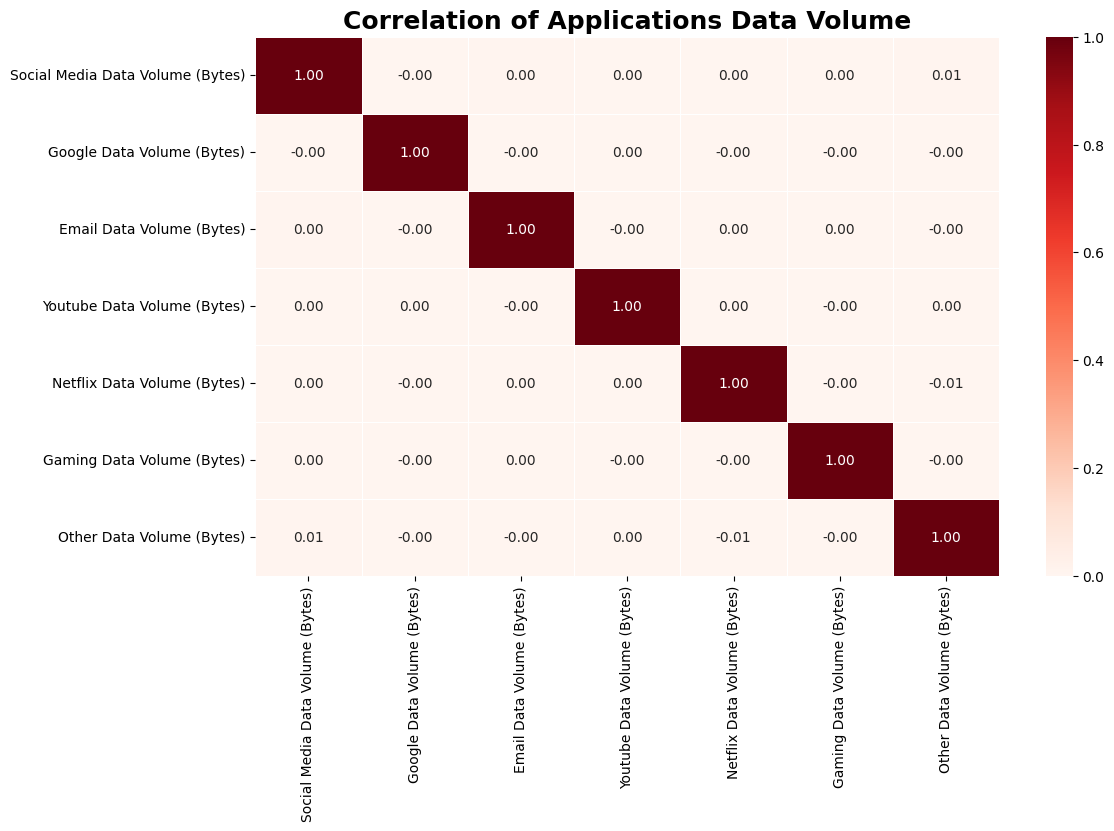

In [42]:
plot_heatmap(corr, "Correlation of Applications Data Volume")

**None:-** *It looks those applications are not significantly correlated each other. On the other hand some appliatons has a negative correlation.I.e. Google usage sessions increase Gamming and social media data sessions decreases and vice versa.*

## - Top 10 handsets used by the customers

In [43]:
def count_values(data, column_name):
    value_counts = data[column_name].value_counts().reset_index()
    value_counts.columns = [column_name, 'counts']
    return value_counts

In [44]:
handset_type = count_values(clean_data,'Handset Type').head(10)
handset_type

,Handset Type,counts
0,Huawei B528S-23A,19373
1,Apple iPhone 6S (A1688),9369
2,Apple iPhone 6 (A1586),8967
3,undefined,8820
4,Apple iPhone 7 (A1778),6240
5,Apple iPhone Se (A1723),5150
6,Apple iPhone 8 (A1905),4961
7,Apple iPhone Xr (A2105),4542
8,Samsung Galaxy S8 (Sm-G950F),4404
9,Apple iPhone X (A1901),3788


## - Top 3 Handset Manufacturers

In [45]:
HS_man = count_values(clean_data, 'Handset Manufacturer').head(3)
HS_man

,Handset Manufacturer,counts
0,Apple,59069
1,Samsung,39902
2,Huawei,33754


## - Top 5 handsets of the top 3 handset manufacturers

In [46]:
top3_HS_man = HS_man['Handset Manufacturer'].values
HS_man = clean_data[clean_data["Handset Manufacturer"].isin(top3_HS_man)]

HS_man['Handset Type'].groupby(clean_data['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5150
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: Handset Typ

In [47]:
top3_HS_man = clean_data['Handset Manufacturer'].value_counts().head(3).index
HS_man = clean_data[clean_data["Handset Manufacturer"].isin(top3_HS_man)]

result = HS_man.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
result

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5150
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: count, dtyp

**Here, From the Above result we can understand that:-**
- The most used handset model by customer is **Huawei B528S-23A** which is manufactured by **Huawei**
- In regard to manufacturing the highest counts of handsets are made by Apple.But, it looks that Apple's Handset are not prefered by customers.This concers **Samsung** manufacturers too.              
- Since, they have high customers to use, Huawei Handsets manufacturers can be recommended to increase the manufacturing capability to increase there acces to customers.

## - Number of xDR sessions of per user

In [48]:
sessions_per_user = find_agg(clean_data, 'MSISDN/Number', 'count', 'Bearer Id', False)
sessions_per_user.rename(
        columns={'Bearer Id': 'Number of xDR sessions'}, inplace=True)
sessions_per_user.head()

,MSISDN/Number,Number of xDR sessions
0,33761613824,66
1,33761214464,39
2,33761611776,37
3,33659359232,37
4,33661859840,36


## - Average session durations per user

In [49]:
avg_session_durations_per_user = clean_data.groupby('MSISDN/Number').agg({'Dur. (ms).1': 'mean'})
avg_session_durations_per_user.rename(
        columns={'Dur. (ms).1': 'Average session duration (ms)'}, inplace=True)
avg_session_durations_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
33603477504,245108154.0
33780574208,245108154.0
337000045477888,245108154.0
33622931456,245108154.0
33781559296,245108154.0
33771741184,245108154.0
33771728896,245108154.0
33771687936,245108154.0
33771284480,245108154.0


## - Total download (DL) and upload (UL) data per user

In [50]:
total_data = clean_data.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(10, 'Total Data Volume (Bytes)')

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33761613824,2.717182e+09,3.320453e+10,3.592171e+10
33761214464,1.564570e+09,1.809131e+10,1.965588e+10
33659359232,1.450403e+09,1.794340e+10,1.939380e+10
33658066944,1.367037e+09,1.735679e+10,1.872382e+10
33658490880,1.386887e+09,1.677209e+10,1.815898e+10
33763745792,1.182638e+09,1.577220e+10,1.695484e+10
33650970624,1.219092e+09,1.573571e+10,1.695480e+10
33661859840,1.544901e+09,1.501093e+10,1.655583e+10
33658947584,1.234039e+09,1.530323e+10,1.653727e+10


## - Total data volumne of each application per user

In [51]:
total_apps_data = clean_data.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_apps_data.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33761613824,135010186.0,502805370.0,132267814.0,1.469308e+09,1.466311e+09,3.168684e+10,2.829360e+10,3.592171e+10
33761214464,69073807.0,304814953.0,90701691.0,8.108692e+08,9.657938e+08,1.708729e+10,1.902086e+10,1.965588e+10
33659359232,68144918.0,309953828.0,78307805.0,8.584862e+08,7.944272e+08,1.703816e+10,1.649274e+10,1.939380e+10
33658066944,54175238.0,258863085.0,73155604.0,6.889112e+08,7.587670e+08,1.660041e+10,1.331277e+10,1.872382e+10
33658490880,59558914.0,250834664.0,77599237.0,7.473275e+08,8.298675e+08,1.588107e+10,1.392271e+10,1.815898e+10
33763745792,55513422.0,232154428.0,68348781.0,6.773165e+08,6.272511e+08,1.505563e+10,1.181759e+10,1.695484e+10
33650970624,53986435.0,216741946.0,55179078.0,6.826287e+08,5.795982e+08,1.514136e+10,1.424670e+10,1.695480e+10
33661859840,57313028.0,309193904.0,69890491.0,8.943700e+08,7.693446e+08,1.414835e+10,1.643012e+10,1.655583e+10
33658947584,55522185.0,221269228.0,71819255.0,6.739497e+08,6.819306e+08,1.456187e+10,1.360941e+10,1.653727e+10


In [52]:
total_apps_data.describe()

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
count,3.491000e+04,3.491000e+04,3.491000e+04,3.491000e+04,3.491000e+04,3.491000e+04,3.491000e+04,3.491000e+04
mean,7.690365e+06,3.285277e+07,9.505314e+06,9.526820e+07,9.521454e+07,1.810748e+09,1.806180e+09,2.086046e+09
std,8.641199e+06,3.645123e+07,1.059625e+07,1.056374e+08,1.054838e+08,2.038380e+09,2.029271e+09,2.330704e+09
min,9.452000e+03,1.195560e+05,2.608700e+04,2.079550e+05,1.845690e+05,1.228856e+06,1.448279e+06,3.792924e+07
25%,2.293864e+06,1.005271e+07,2.878579e+06,2.804377e+07,2.796118e+07,5.405182e+08,5.433741e+08,6.288940e+08
50%,4.310449e+06,1.863694e+07,5.321874e+06,5.356118e+07,5.347753e+07,1.011406e+09,1.012837e+09,1.173810e+09
75%,9.534704e+06,4.011562e+07,1.162184e+07,1.162376e+08,1.164279e+08,2.231627e+09,2.220667e+09,2.560850e+09
max,1.350102e+08,5.028054e+08,1.322678e+08,1.469308e+09,1.466311e+09,3.168684e+10,2.829360e+10,3.592171e+10


**Note:-** *-From Average (mean) of Total Sessions Gaming has the highest data volume with followed by Other Application and Total Session Google.*